In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

Спектр простого двумерного сигнала и спектр изображения

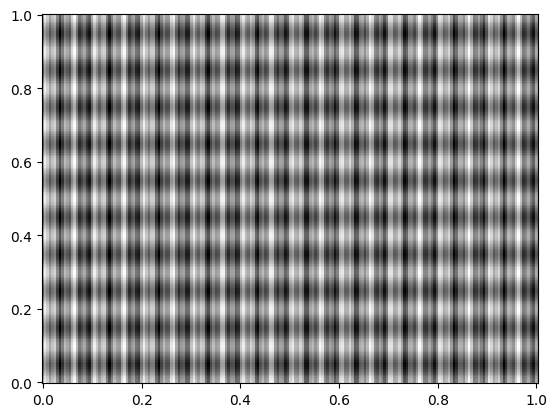

In [2]:
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)

X, Y = np.meshgrid(x, y)

sig = np.sin(2*np.pi*20*X) + np.cos(2*np.pi*10*Y) + np.sin(2*np.pi*50*X)
# sig = np.sin(100*X*Y)

plt.pcolor(X, Y, sig, cmap='gray')

Text(0, 0.5, '$k_y$')

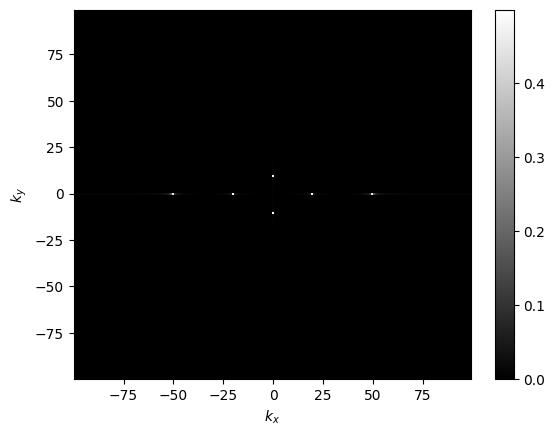

In [3]:
dx = x[1]-x[0]
dy = y[1]-y[0]

dk_x = 1/dx
dk_y = 1/dy

k_x = np.fft.fftshift(np.fft.fftfreq(sig.shape[0])) * dk_x
k_y = np.fft.fftshift(np.fft.fftfreq(sig.shape[1])) * dk_y

sig_fft = np.fft.fftshift(np.fft.fft2(sig))/np.size(sig)

plt.pcolor(k_x, k_y, abs(sig_fft), cmap='gray')
plt.colorbar()
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')

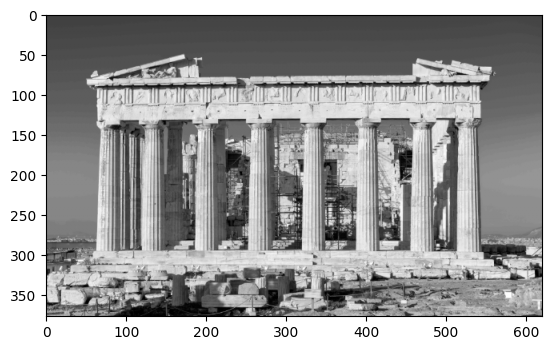

In [4]:
img_path = "data\parthenon.png"
img = np.array(Image.open(img_path).convert('L'))

plt.imshow(img, cmap='gray')

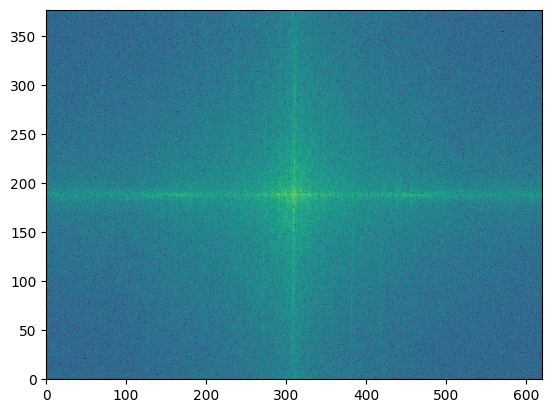

In [5]:
img_fft = np.fft.fftshift(np.fft.fft2(img))/np.size(img)

plt.pcolor(np.log10(abs(img_fft)))

Примеры импульсных характеристик и передаточных функций 

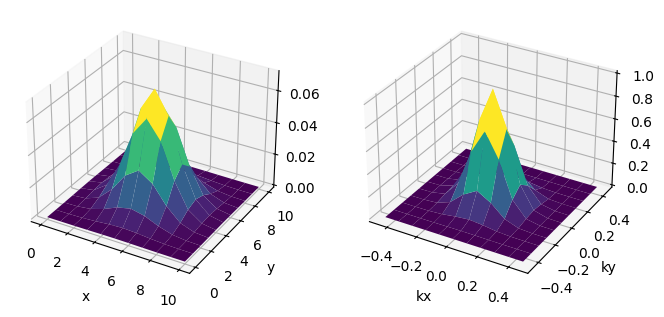

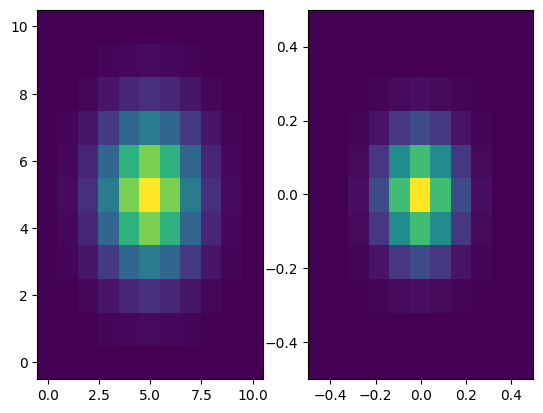

In [6]:
from plot_functions import plot_impulse_and_transfer
from kernels import gauss_kernel

kern_size = (11, 11)
x = list(range(0, kern_size[0]))
y = list(range(0, kern_size[1]))

h_gauss = gauss_kernel(size=(11, 11), sigma=1.5)

# Импульсная характеристика и функция передачи
plot_impulse_and_transfer(h_pulse=h_gauss, x=x, y=y)



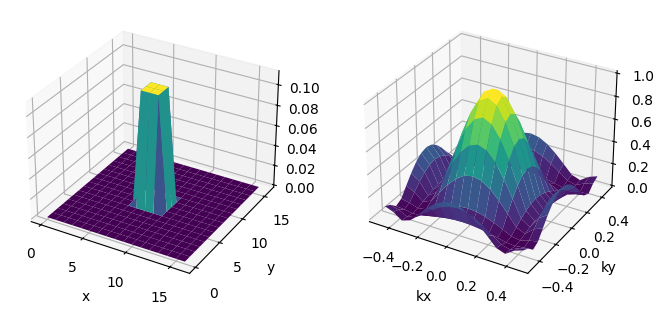

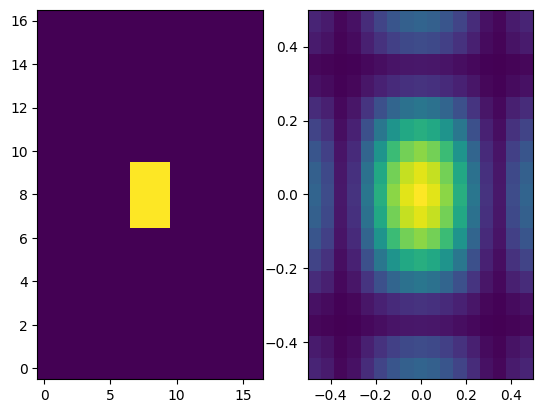

In [7]:
# Усредняющий фильтр
h_aver = 1/9 * np.ones((3, 3))
h_aver = np.pad(h_aver, 7)

plot_impulse_and_transfer(h_pulse=h_aver)

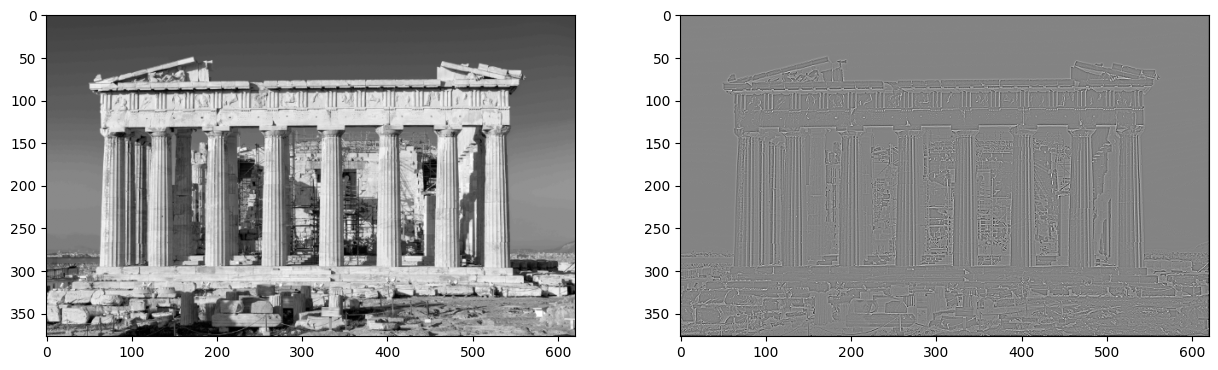

In [8]:
img_path = "data\parthenon.png"
img = np.array(Image.open(img_path).convert('L'))

# Фильтр Лапласа
import scipy
import scipy.signal

h_laplace = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])
# Применим фильтр к изображению
img_filt = scipy.signal.convolve2d(img, h_laplace, mode='same')

fig, ax = plt.subplots(1, 2, figsize=(15, 12))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_filt, cmap='gray')